In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/min_wage.csv')

df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [45]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[["Low.2018"]].rename(columns={'Low.2018':name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[["Low.2018"]].rename(columns={'Low.2018':name}))
    
act_min_wage.tail()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2013,0.0,8.33,8.38,6.72,8.60,8.36,8.87,7.79,8.87,7.79,...,0.0,7.79,4.62,7.79,9.24,7.79,9.88,7.79,7.79,5.54
2014,0.0,8.20,8.36,6.61,9.52,8.46,9.20,8.20,10.05,7.67,...,0.0,7.67,4.55,7.67,9.23,7.67,9.86,7.67,7.67,5.45
2015,0.0,9.24,8.50,7.92,9.51,8.69,9.67,8.72,11.09,7.66,...,0.0,7.66,4.54,7.66,9.67,7.66,10.00,8.45,7.66,5.44
2016,0.0,10.17,8.40,8.35,10.43,8.67,10.02,8.61,12.00,7.56,...,0.0,7.56,4.49,7.56,10.02,7.56,9.88,9.13,7.56,5.37
2017,0.0,10.01,10.22,8.68,10.22,9.50,10.32,8.43,11.75,7.41,...,0.0,7.41,4.39,7.41,10.22,7.41,11.24,8.94,7.41,5.26


In [46]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [61]:
dfs = pd.read_html('https://www.infoplease.com/state-abbreviations-and-state-postal-codes')

In [63]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [66]:
state_abbv.to_csv('datasets/state_abbv.csv', index=False)

In [68]:
state_abbv = pd.read_csv('datasets/state_abbv.csv', index_col = 0)

state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [70]:
abbv_dict = state_abbv[['Postal Code']].to_dict()

abbv_dict = abbv_dict['Postal Code']

abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [74]:
abbv_dict['Federal (FLSA)'] = 'FLSA'
abbv_dict['Guam'] = 'GU'
abbv_dict['Puerto Rico'] = 'PR'

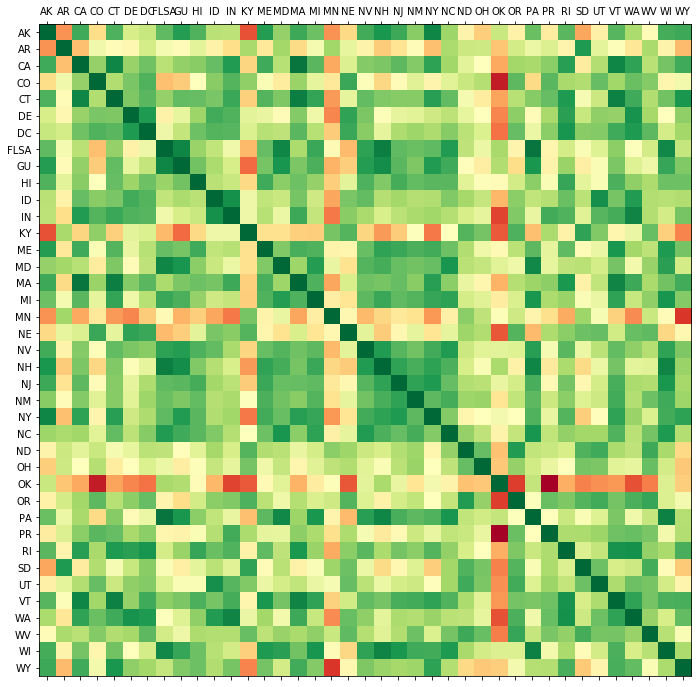

In [75]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()